# King County Housing EDA + Regression

In [1279]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}});

## Importing and cleaning
- 21597 datapoints
- 21 features
- a handful of NaNs

In [1280]:
data = pd.read_csv('kc_house_data.csv')
display(data.head())

len_before = len(data)
print("Dataset size: {}".format(len_before))
display(data.describe())
print("NaN info:")
print(data.isna().sum())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Dataset size: 21597


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


NaN info:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


When I think of housing assessors, I think of the term "price per square foot." I read online that this is typically the square feet of the home, excluding the basement; the same as our `sqft_above` feature.

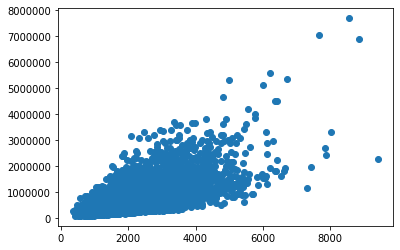

In [1281]:
plt.scatter(data['sqft_above'],data['price'])

### NaNs  
Explicit NaNs:  
- waterfront  
- yr_renovated  
- view  

Waterfront NaNs: 2376


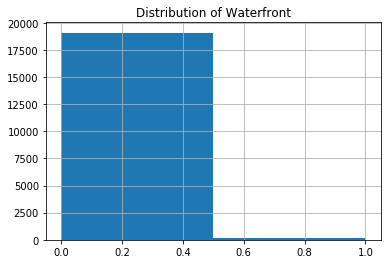

In [1282]:
print('Waterfront NaNs: {}'.format(data['waterfront'].isna().sum()))
data['waterfront'].hist(bins=2).set_title('Distribution of Waterfront');

Since 0 (not waterfront) is by far most likely, I'll just set the NaNs to that.

In [1283]:
data['waterfront'].fillna(0, inplace=True)

Although I expect `yr_renovated` to be insufficiently correlated to keep for regression, I might as well take care of the NaNs. Out of curiousity, I also aggregated the houses that had renovations and put their years thereof in a histogram.

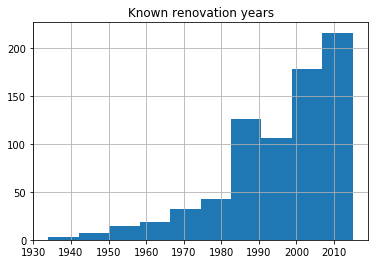

In [1284]:
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'] = data['yr_renovated'].astype(int)
data[data['yr_renovated'] > 0]['yr_renovated'].hist().set_title('Known renovation years');

Finally, let's look at `view`.

View NaNs: 63


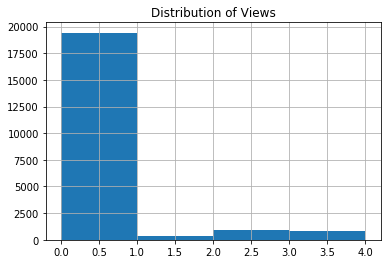

In [1285]:
print('View NaNs: {}'.format(data['view'].isna().sum()))
data['view'].hist(bins=4).set_title('Distribution of Views');

There relatively few NaNs in `view`, and they aren't boolean like `waterfront`, so I feel comfortable dropping those datapoints entirely.

In [1286]:
data.dropna(inplace=True)

# count the datapoints lost in cleaning
print('Dataset Size\nBefore: {}\t After: {}\t Difference: {}'.format(
    len_before, len(data), (len_before - len(data))))

Dataset Size
Before: 21597	 After: 21534	 Difference: 63


### Placeholders
On first inspection of the data, I noticed `sqft_basement` had a placeholder value `'?'`.

In [1287]:
display(data['sqft_basement'].value_counts())
ph_count = len(data[data['sqft_basement'] == '?'])
print("Placeholders in `sqft_basement`: {}".format(ph_count))

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
2720.0        1
176.0         1
2580.0        1
768.0         1
2610.0        1
Name: sqft_basement, Length: 302, dtype: int64

Placeholders in `sqft_basement`: 452


It looks like ~60% of houses have no basement, so I'll throw the placeholders in with them.

In [1288]:
data.loc[data['sqft_basement'] == '?','sqft_basement'] = 0.

# a few dtypes to change
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)
data['sqft_basement'] = data['sqft_basement'].astype(float).astype(int)

I suspect that the year of construction and any year of renovation are probably very weakly correlated to the house sale price. Let's look at some plots.

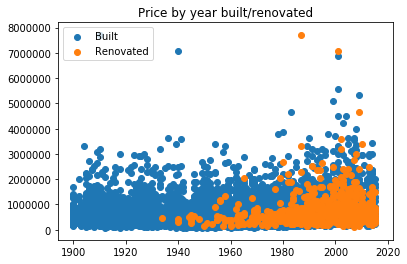

In [1289]:
plt.scatter(data['yr_built'],data['price']);
renovated = data.loc[data['yr_renovated'] > 0,'yr_renovated']
ren_price = data.loc[data['yr_renovated'] > 0,'price']
plt.scatter(renovated,ren_price)
plt.title("Price by year built/renovated")
plt.legend(["Built","Renovated"],loc='upper left');

Renovation year looks more relevant than construction year, but the number of non-renovations might drag this category down. Let's check it out just to be sure.

In [1290]:
np.corrcoef(data['yr_renovated'],data['price'])

array([[1.        , 0.11798207],
       [0.11798207, 1.        ]])

I also suspect that the price as a function of year built/renovated has some relationship with the date of sale. Although there may be useful information in those relationships, modeling them lies outside the scope of this EDA.

In [1291]:
data.drop('yr_built',axis=1,inplace=True)
data.drop('yr_renovated',axis=1,inplace=True)

### Outlier control
A quick pass for outliers. A low contamination ratio, so it doesn't find outliers too harshly.

In [1292]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour='new', contamination=0.08)

# only the columns that can have outlier values
floatints = data[['price','bedrooms','bathrooms','sqft_living',
                  'sqft_lot','floors','sqft_above','sqft_basement',
                  'sqft_living15','sqft_lot15']]

# -1 indicates outlier
data['cleaver'] = clf.fit_predict(floatints)

old_size = len(data)

indexes = data[data['cleaver'] == -1].index
data.drop(indexes, inplace=True)

new_size = len(data)
print('Isolation Forest removed {} outliers.'.format(old_size - new_size))

data.drop('cleaver',axis=1,inplace=True)

Isolation Forest removed 1723 outliers.


## Feature engineering

### Neighborhoods
I suspect that the neighborhood and distance from nearest central buisness district may be important factors. Zipcodes could help with that, but they don't necessarily convey neighborhoods as experienced by residents, plus they'd make for a lot of one-hot columns.  

Instead, I'm going to drop zipcodes and use [this dataset I found online](https://gis-kingcounty.opendata.arcgis.com/datasets/neighborhood-centers-in-king-county-neighborhood-centers-point/data?page=5) to find each datapoint's nearest CBD and calculate the distance thereto.

In [1293]:
data.drop('zipcode',axis=1,inplace=True)
hoods = pd.read_csv('Neighborhood_Centers_in_King_County__neighborhood_centers_point.csv')
hoods.head(3)

,X,Y,OBJECTID,FEATURE_ID,CODE,NAME,ADDRESS,NEIGH_NUM,XCOORD,YCOORD,LONGITUDE,LATITUDE
0,-122.355548,47.723233,1,90001,Community Area/Business Center/Neighborhood,Bitter Lake Neighborhood,N 130th St & Greenwood Ave N,3,1.265776e+06,267518.406033,-122.355550,47.723232
1,-122.323274,47.708595,2,90002,Community Area/Business Center/Neighborhood,Northgate Neighborhood,NE Northgate Way & 5th Ave NE,28,1.273615e+06,262024.468858,-122.323276,47.708593
2,-122.295226,47.719280,3,90003,Community Area/Business Center/Neighborhood,Lake City Neighborhood,NE 125th & Lake City Way NE,21,1.280593e+06,265788.625044,-122.295228,47.719278


In [1294]:
from operator import itemgetter
from haversine import haversine # calculates distance given latitudes and longitudes

def find_cbd(df,hoods):
    ''' Finds nearest CBD and distance therefrom
    
    Parameters:
    df (pd.DataFrame): the King County Housing dataset
    hoods (pd.DataFrame): The Neighborhood Centers in King County dataset
    
    Returns:
    pd.DataFrame: a new dataframe containing nearest neighborhood and distance features
    
    '''
    nearest_hoods,dist_hoods = [],[]
    for row in df.iterrows():
        lat = row[1]['lat']
        lon = row[1]['long']
        to_cbd = []
        for hood in hoods.iterrows(): # consider all neighborhoods
            dist = haversine((lat,lon),
                             (hood[1]['LATITUDE'],hood[1]['LONGITUDE']),
                             unit='mi')
            to_cbd.append({'CBD' : hood[1]['NAME'],
                           'DIST' : dist})
        sortd = sorted(to_cbd, key=itemgetter('DIST')) # sort by distance, ascending
        nearest_hoods.append(sortd[0]['CBD']) # nearest CBD
        dist_hoods.append(sortd[0]['DIST']) # distance thereto
    new_panda = pd.DataFrame()
    new_panda['nearest_hoods'] = nearest_hoods
    new_panda['dist_hoods'] = dist_hoods
    return new_panda


# option to save because finding the 'hoods takes a little while

# saving
#hoods_data = find_cbd(data,hoods) # uncomment if saving
#hoods_data.to_csv('hoods_data.csv',index=False) # uncomment if saving
# loading
hoods_data = pd.read_csv('hoods_data.csv') # uncomment if loading

data = pd.concat([data,hoods_data],join='inner',axis=1) # join neighborhood data to the primary dataframe

`nearest_hoods` will need to be numerically indexed.

In [1295]:
data[['nearest_hoods','dist_hoods','price']].head()

,nearest_hoods,dist_hoods,price
0,Rainier Beach Neighborhood,1.032990,221900.0
1,Northgate Neighborhood,0.879959,538000.0
2,Finn Hill Neighborhood,0.741188,180000.0
3,Morgan Junction Neighborhood,1.684835,604000.0
4,Eastgate Neighborhood,5.275227,510000.0


In [1296]:
data['nearest_hood'] = data['nearest_hoods'].astype('category')
data['nearest_hood'] = data['nearest_hood'].cat.codes # numerically index
data.drop('nearest_hoods',axis=1,inplace=True)
data[['nearest_hood','dist_hoods','price']].head()

,nearest_hood,dist_hoods,price
0,32,1.032990,221900.0
1,30,0.879959,538000.0
2,13,0.741188,180000.0
3,25,1.684835,604000.0
4,11,5.275227,510000.0


### Date
I'm curious whether house-price trends are seasonally cyclic. First I'll look at the number of houses sold by month.

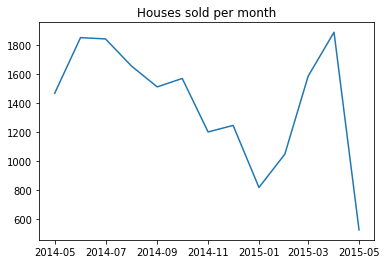

In [1297]:
from datetime import datetime

data['date'] = pd.to_datetime(data['date'],infer_datetime_format=False)

monthly_counts = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].count().to_frame().reset_index()
monthly_counts['date'] = monthly_counts['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_counts['date'],monthly_counts['price'])
plt.title("Houses sold per month");
# don't trust the first or last months, since they may have began/ended polling mid-month

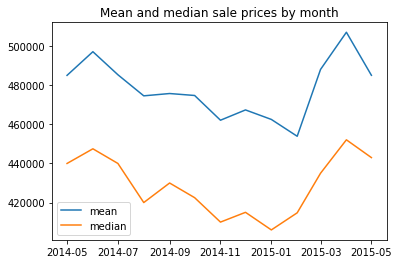

In [1298]:
monthly_means = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].mean().to_frame().reset_index()
monthly_means['date'] = monthly_means['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_means['date'],monthly_means['price'])

monthly_medians = data.groupby(data['date'].dt.strftime('%y/%m'))['price'].median().to_frame().reset_index()
monthly_medians['date'] = monthly_medians['date'].apply(lambda x: datetime.strptime(x,'%y/%m'))
plt.plot(monthly_medians['date'],monthly_medians['price'])
plt.legend(["mean","median"])
plt.title("Mean and median sale prices by month");

In [1299]:
data.drop('date',axis=1,inplace=True)

### one-hot encoding

In [1300]:
def quick_dummies(df,column,drop_first=True):
    ''' Converts a dataframe column to dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    dummies = pd.get_dummies(dfc[column],prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,dummies],axis=1)
    return dfc

# `grade` needs retyping
data['grade'] = data['grade'].astype('category')

# experimentally I found that > 6 rooms didn't matter much, so I'll bin them
data.loc[data['bedrooms'] >= 6,'bedrooms'] = 6

# the categorical columns
to_dummies = ['condition','view','floors','bedrooms','grade']

for col in to_dummies:
    data = quick_dummies(data,col)
    
print('Columns:')
display(data.head())

Columns:


,id,price,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,...,bedrooms_5,bedrooms_6,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11
0,7129300520,221900.0,1.00,1180,5650,0,1180,0,47.5112,-122.257,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,538000.0,2.25,2570,7242,0,2170,400,47.7210,-122.319,...,0,0,0,0,0,1,0,0,0,0
2,5631500400,180000.0,1.00,770,10000,0,770,0,47.7379,-122.233,...,0,0,0,0,1,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,0,1050,910,47.5208,-122.393,...,0,0,0,0,0,1,0,0,0,0
4,1954400510,510000.0,2.00,1680,8080,0,1680,0,47.6168,-122.045,...,0,0,0,0,0,0,1,0,0,0


### Binning
I've made a list `to_cut` of continuous features that might do better as binned categoricals. First I'll plot them, and keep the somewhat linearly related features.

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


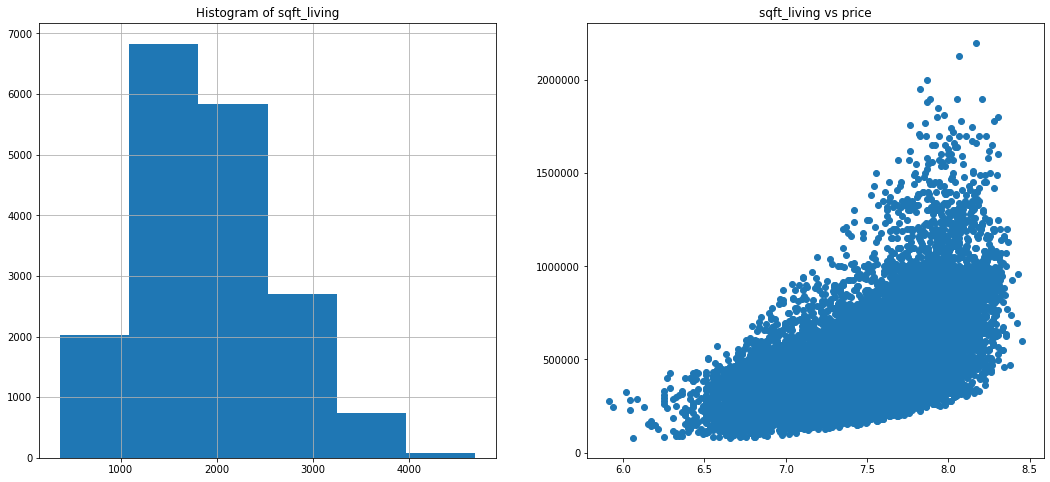

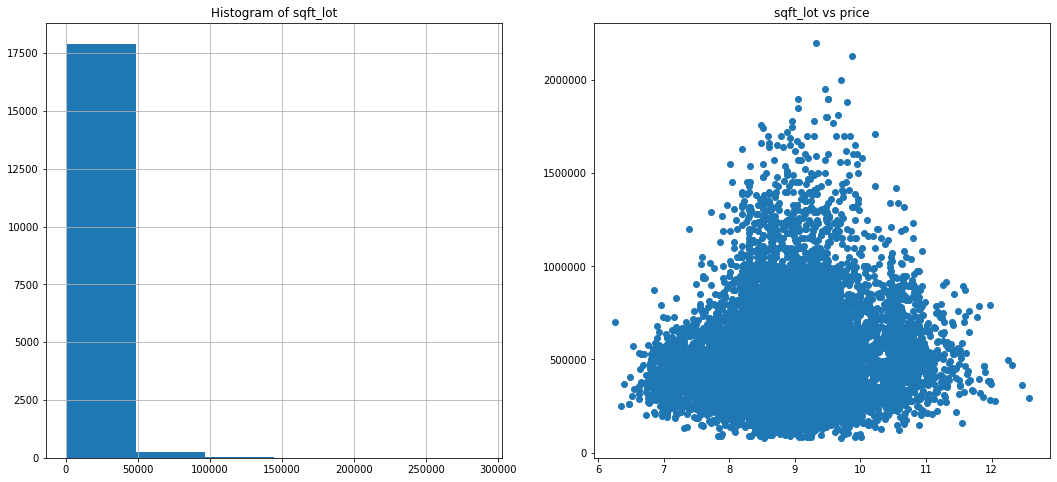

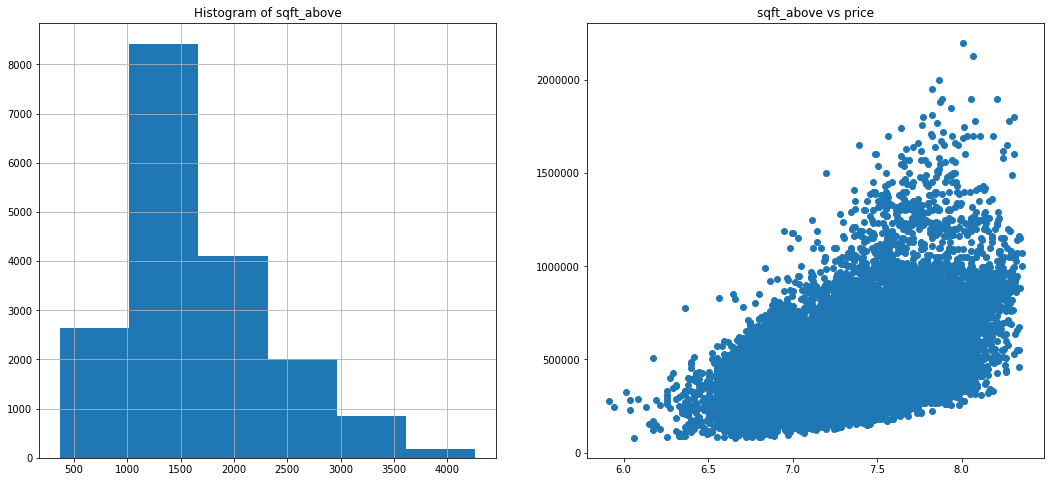

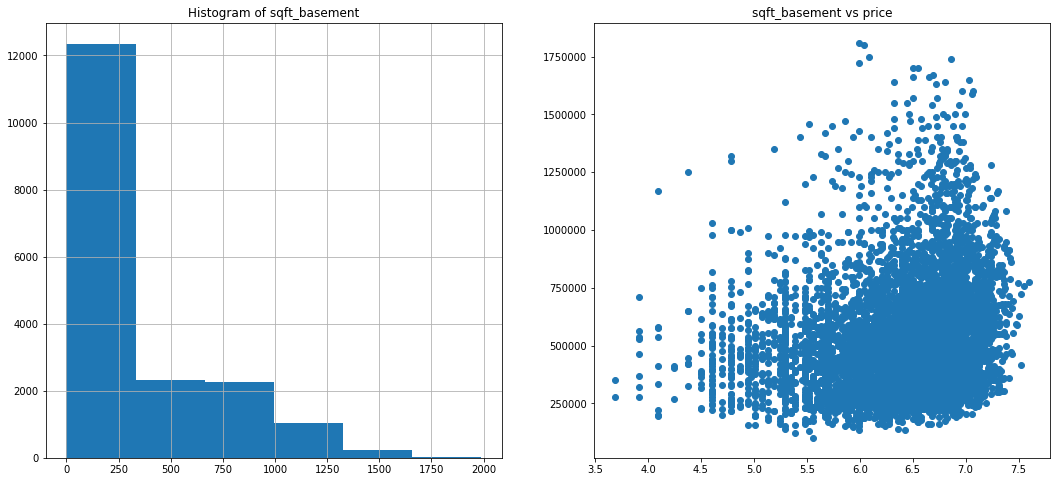

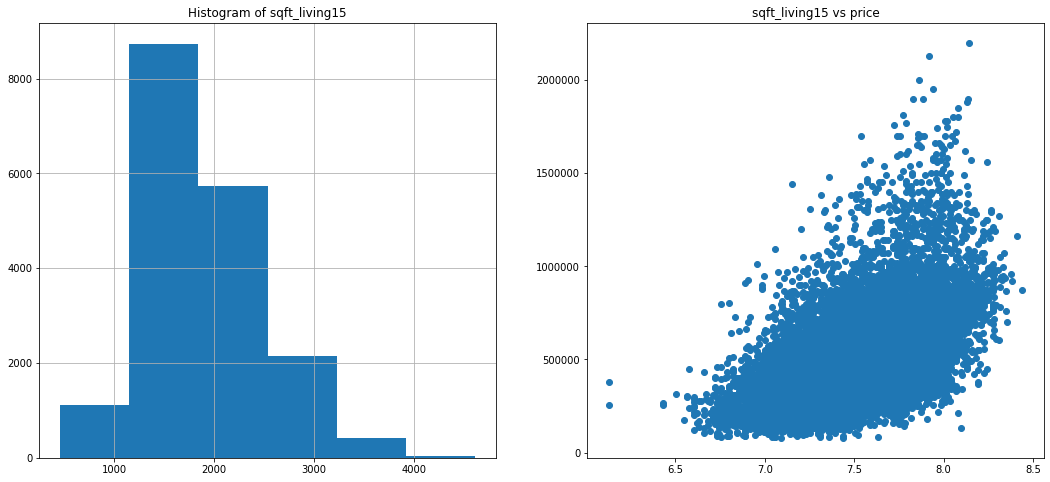

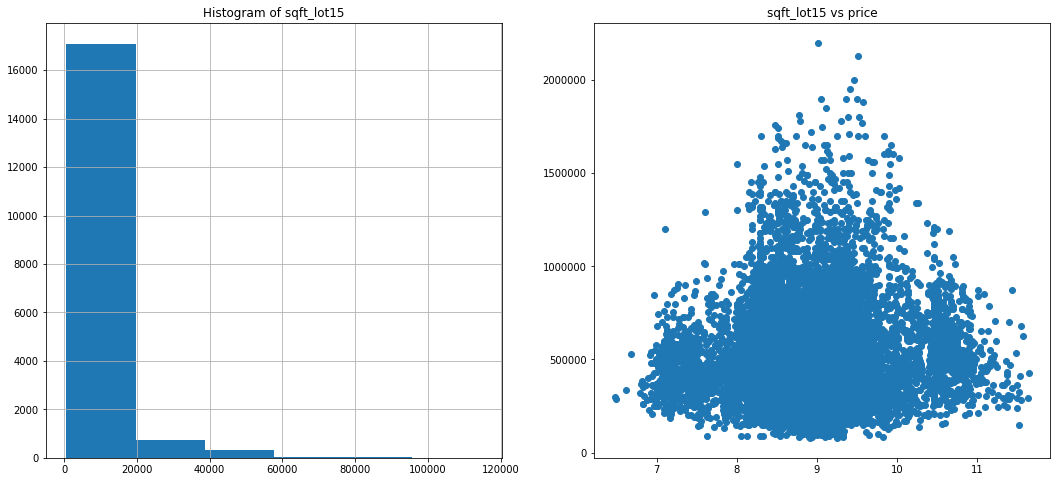

In [1301]:
to_cut = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

for col in to_cut:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    data[col].hist(bins=6)
    plt.title('Histogram of {}'.format(col))
    plt.subplot(1,2,2)
    plt.scatter(np.log(data[col]),data['price'])
    plt.title('{} vs price'.format(col));

In [1302]:
to_cut = ['sqft_lot','sqft_basement','sqft_lot15'] # okay, just these ones

def quick_cut(df,column,q=6,drop_first=True):
    ''' Converts a continuous dataframe column to quantile-binned dummies
    
    Parameters:
    df (pd.DataFrame): the dataframe in question
    column (str): the column name for conversion
    q (int): quantiles at which to slice
    drop_first (bool): whether to drop dummy column with fewest positives
    
    Returns:
    pd.DataFrame: the modified copy of the dataframe
    
    '''
    dfc = df.copy()
    temp = pd.qcut(dfc[column],q,duplicates='drop')
    temp = pd.get_dummies(temp,prefix=column,drop_first=drop_first)
    dfc.drop(column,axis=1,inplace=True)
    dfc = pd.concat([dfc,temp],axis=1)
    return dfc

for col in to_cut:
    data[col] = quick_cut(data,col)
    
# I'm also going to bin and one-hot the `bathrooms` category.
# I did this manually because I wanted to select the bins.
# I selected the bins by measuring each `bathrooms` impact on linear regressions
bins = [0., 2.,2.,4.,4.,8.]
temp = pd.cut(data['bathrooms'],bins,duplicates='drop')
temp = pd.get_dummies(temp,prefix='bathrooms_',drop_first=True)
data.drop('bathrooms',axis=1,inplace=True)
data = pd.concat([data,temp],axis=1,join='inner')

data.head()

,id,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,"bathrooms__(2.0, 4.0]","bathrooms__(4.0, 8.0]"
0,7129300520,221900.0,1180,7.129301e+09,0,1180,7.129301e+09,47.5112,-122.257,1340,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,2570,6.414100e+09,0,2170,6.414100e+09,47.7210,-122.319,1690,...,0,0,0,1,0,0,0,0,1,0
2,5631500400,180000.0,770,5.631500e+09,0,770,5.631500e+09,47.7379,-122.233,2720,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,1960,2.487201e+09,0,1050,2.487201e+09,47.5208,-122.393,1360,...,0,0,0,1,0,0,0,0,1,0
4,1954400510,510000.0,1680,1.954401e+09,0,1680,1.954401e+09,47.6168,-122.045,1800,...,0,0,0,0,1,0,0,0,0,0


### Log transformation
I'm going to check if log transformations can help some of the features. For each feature, the left histogram shows the current distribution, while the right shows the log of the same.

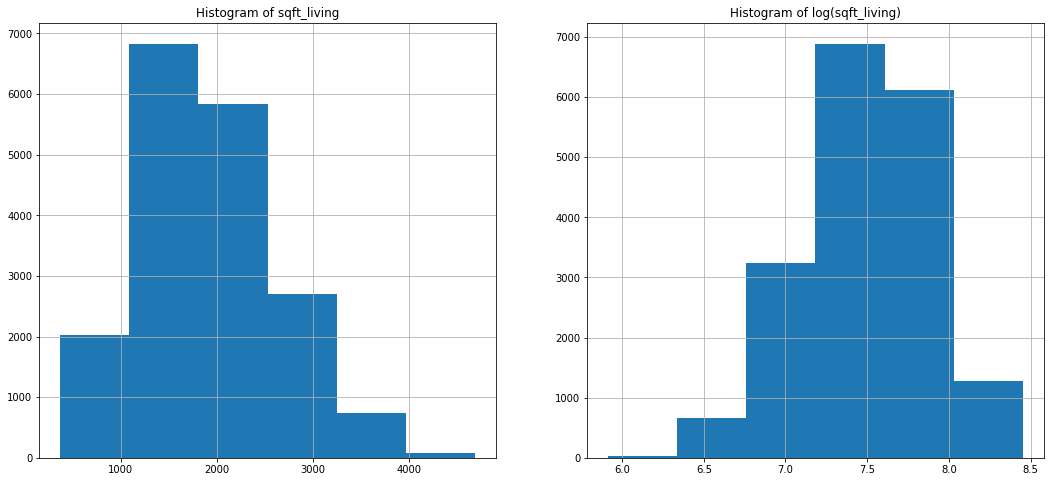

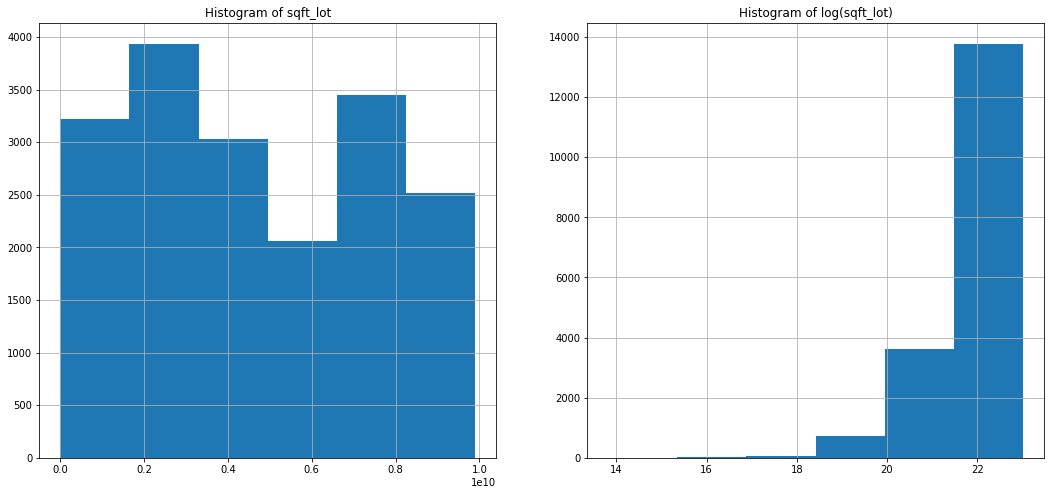

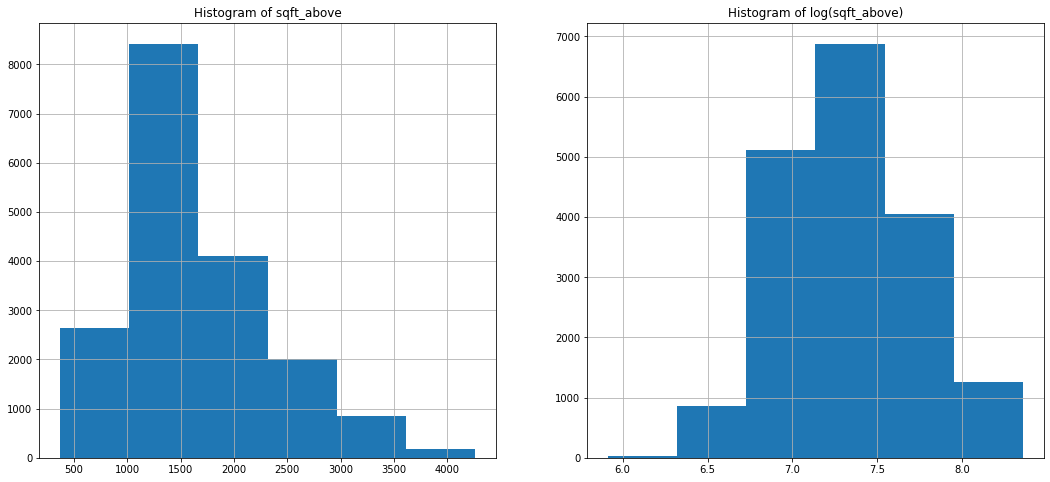

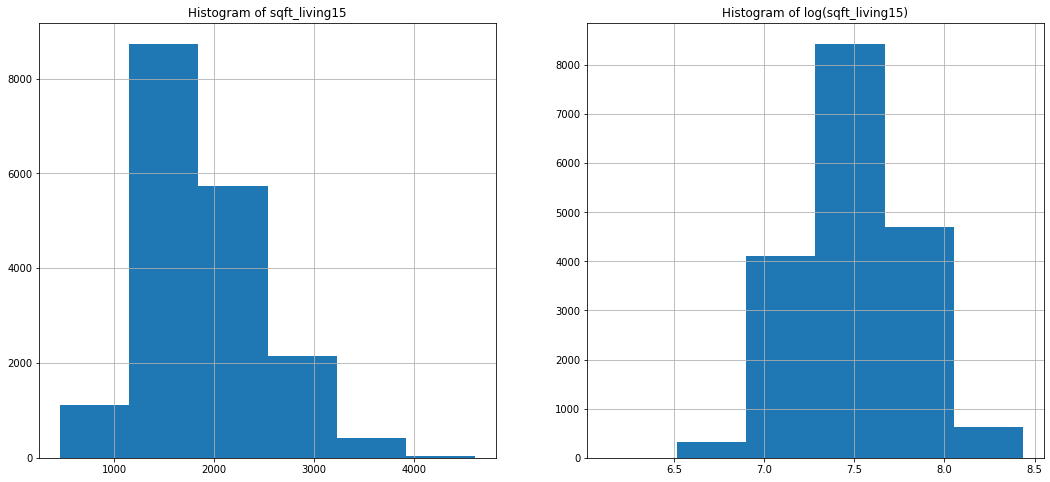

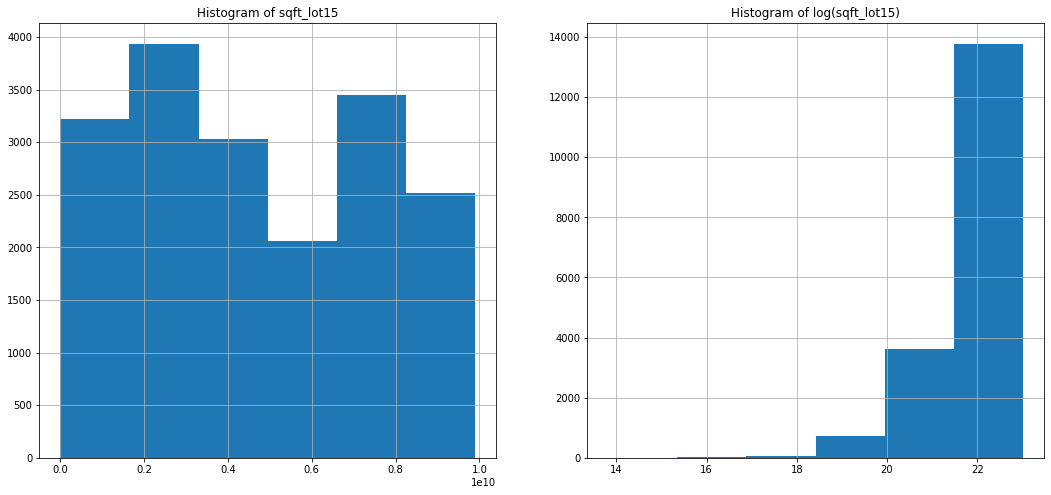

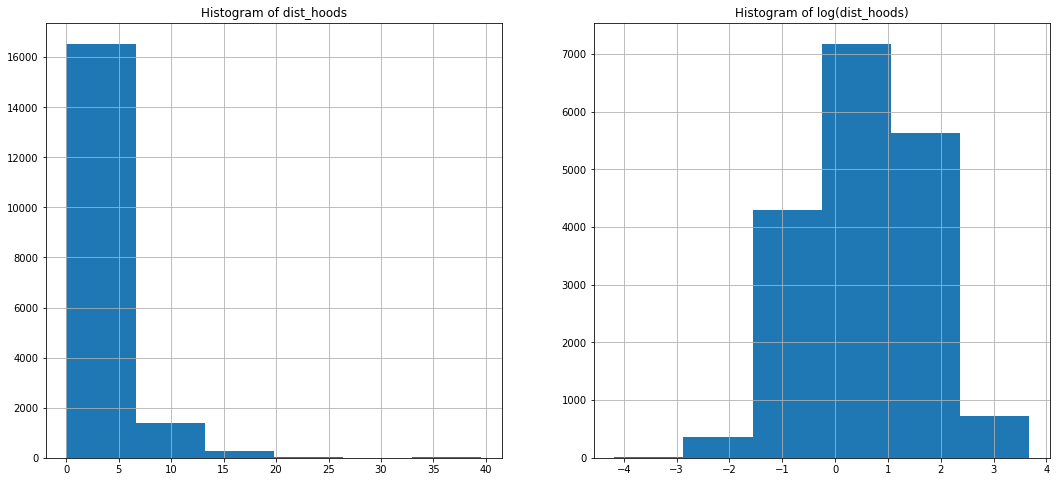

In [1303]:
qdata = data.copy()
to_log = ['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15','dist_hoods']
for col in to_log:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    data[col].hist(bins=6)
    plt.title('Histogram of {}'.format(col))
    plt.subplot(1,2,2)
    qdata[col] = np.log(qdata[col])
    qdata[col].hist(bins=6)
    plt.title('Histogram of log({})'.format(col));
    
del qdata

Several look like they could benefit from a log transform. However, by experimentation I found that linear regression performed far better without having transformed any variables.

## Linear Regression
I'll begin by dropping unnecessary features, and assigning the target feature to `y`.

In [1304]:
X = data.copy()

# unnecessary features
X.drop('lat',axis=1,inplace=True)
X.drop('long',axis=1,inplace=True)
X.drop('id',axis=1,inplace=True)

y = X.pop('price') # remove 'price' from X and save as y

### p-values and feature importance
Statsmodels OLS can provide some useful insights.

In [1305]:
import statsmodels.api as sm

_X = sm.add_constant(X)
est = sm.OLS(y,_X).fit()
est.summary()

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     570.0
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:31:48   Log-Likelihood:            -2.4432e+05
No. Observations:               18206   AIC:                         4.887e+05
Df Residuals:                   18170   BIC:                         4.890e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.848e+04   1.66e+05      0.412      0.680   -2.57e+05    3.94e+05
sqft_living             130.1402      4.128     31.527      0.000     122.049     138.231
sqft_lot                 -0.1724      0.128     -1.343      0.179      -0.424       0.079
waterfront             1.819e+05   2.38e+04      7.657      0.000    1.35e+05    2.28e+05
sqft_above              -63.9560      4.338    -14.743      0.000     -72.459     -55.453
sqft_basement             0.0862      0.064      1.343      0.179      -0.040       0.212
sqft_living15            53.9674      3.437     15.701      0.000      47.230      60.705
sqft_lot15                0.0862      0.064      1.343      0.179      -0.040       0.212
dist_hoods              368.1459    377.844      0.974      0.330    -372.464    1108.756
nearest_hood            198.3493    101.396      1.956      0.050      -0.397     397.096
condition_2            -2.14e+04   3.41e+04     -0.628      0.530   -8.82e+04    4.54e+04
condition_3           -7185.7348   3.17e+04     -0.227      0.821   -6.93e+04    5.49e+04
condition_4            2.773e+04   3.17e+04      0.875      0.382   -3.44e+04    8.99e+04
condition_5            8.797e+04   3.19e+04      2.758      0.006    2.55e+04     1.5e+05
view_1                 1.041e+05      1e+04     10.368      0.000    8.44e+04    1.24e+05
view_2                 7.453e+04   6325.126     11.783      0.000    6.21e+04    8.69e+04
view_3                 1.091e+05   9512.703     11.464      0.000    9.04e+04    1.28e+05
view_4                 2.322e+05   1.59e+04     14.618      0.000    2.01e+05    2.63e+05
floors_1.5             1.082e+05   4353.277     24.861      0.000    9.97e+04    1.17e+05
floors_2.0             2.475e+04   4058.424      6.099      0.000    1.68e+04    3.27e+04
floors_2.5             1.534e+05   2.04e+04      7.523      0.000    1.13e+05    1.93e+05
floors_3.0             7.467e+04   1.05e+04      7.108      0.000    5.41e+04    9.53e+04
floors_3.5             7.363e+04   8.17e+04      0.901      0.367   -8.65e+04    2.34e+05
bedrooms_2             3556.1909   1.31e+04      0.271      0.787   -2.22e+04    2.93e+04
bedrooms_3            -4.702e+04   1.31e+04     -3.590      0.000   -7.27e+04   -2.14e+04
bedrooms_4            -5.201e+04   1.34e+04     -3.879      0.000   -7.83e+04   -2.57e+04
bedrooms_5            -5.186e+04   1.43e+04     -3.624      0.000   -7.99e+04   -2.38e+04
bedrooms_6            -1.844e+04   1.82e+04     -1.011      0.312   -5.42e+04    1.73e+04
grade_4               -7151.3896   1.66e+05     -0.043      0.966   -3.33e+05    3.19e+05
grade_5                8215.8175   1.64e+05      0.050      0.960   -3.13e+05    3.29e+05
grade_6                5.763e+04   1.64e+05      0.352      0.725   -2.63e+05    3.78e+05
grade_7                

I can use the p-values from these OLS regression results to winnow my features

In [1306]:
cols_before = len(X.columns)

for col in X.columns:
    if (est.pvalues > 0.05)[col]:
        X.drop(col,axis=1,inplace=True)

cols_after = len(X.columns)
print("{} of {} columns removed for p-values greater than .05".format((cols_before - cols_after), cols_before))

17 of 37 columns removed for p-values greater than .05


In reality, leaving some of these in can improve the r_score by value of ~0.05. Although significant, I've kept only p > 0.05 as per assignment rules.

### Scale feature values
to the interval (0,1)

In [1307]:
from sklearn.preprocessing import MinMaxScaler

# separate scalers so we can encode/decode separately
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# scale everything to between 0 and 1
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.ravel().reshape(-1,1))

### Train/test split

In [1308]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X_scaled,y_scaled,test_size=0.2)

In [1309]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
preds = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.4929737001080444

In [1310]:
from sklearn.ensemble import RandomForestRegressor as rfr
rf = rfr()
rf.fit(X_scaled,y_scaled)
importances = rf.feature_importances_
imp_list = []
for i,col in enumerate(X.columns):
    imp_list.append({'column':col,'importance':importances[i]})

sorted(imp_list,key=lambda x:x['importance'],reverse=True)

C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\root\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[{'column': 'sqft_living', 'importance': 0.4435745611798477},
 {'column': 'sqft_living15', 'importance': 0.2060874565320514},
 {'column': 'sqft_above', 'importance': 0.13532404764328318},
 {'column': 'grade_9', 'importance': 0.031782478380957},
 {'column': 'grade_10', 'importance': 0.02246289412867082},
 {'column': 'condition_5', 'importance': 0.01833670466953311},
 {'column': 'view_4', 'importance': 0.017349998378666524},
 {'column': 'floors_1.5', 'importance': 0.016133549842486793},
 {'column': 'floors_2.0', 'importance': 0.015360453778364758},
 {'column': 'bedrooms_3', 'importance': 0.013821439245332348},
 {'column': 'bedrooms_4', 'importance': 0.01308803671142389},
 {'column': 'bathrooms__(2.0, 4.0]', 'importance': 0.012048192520114137},
 {'column': 'grade_11', 'importance': 0.011472463429524652},
 {'column': 'view_2', 'importance': 0.010501679505552346},
 {'column': 'view_3', 'importance': 0.00839083039873245},
 {'column': 'bedrooms_5', 'importance': 0.007757981999938556},
 {'colu

In [1311]:
#orre = X.corr()
#orre.style.background_gradient(cmap='coolwarm').set_precision(3)

In [1312]:
#del corre
import gc
gc.collect()

33737

In [1313]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [1314]:
K.clear_session()

reduce_lr = ReduceLROnPlateau(patience=5,min_lr=1e-7)
early_stop = EarlyStopping(patience=12)

entry = L.Input(shape=(X_train.shape[1],))
x = L.GaussianNoise(0.1)(entry)
x = L.Dense(64)(x)
x = L.LeakyReLU()(x)
x = L.Dense(32)(x)
x = L.LeakyReLU()(x)
x = L.Dense(14,kernel_regularizer=l1(2e-4))(x)
x = L.Dense(1)(x)

model = Model(entry, x)
model.compile(loss='mse', optimizer='adam',metrics=['acc'])

In [1315]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, verbose=0, callbacks=[reduce_lr,early_stop])

In [1316]:
preddy = model.predict(X_test)
r2_score(y_test,preddy)
# 56.1
# 56.1
# 56.0
# 56.1
# 57.7
# 57.6
# 57.5
# 57.3
# 49.9
# 47.7
# 44.2
# 53.0
# 53.2
# 61.0
# 66.3
# 62.3
# 63.5

0.48719753314888137

In [1317]:
dfdf = pd.DataFrame()
dfdf['price'] = np.squeeze(y_scaler.inverse_transform(y_test))
dfdf['prediction'] = np.squeeze(y_scaler.inverse_transform(preds))
dfdf.head()

,price,prediction
0,665000.0,558900.524230
1,644500.0,598986.152123
2,390000.0,431855.438130
3,280000.0,391929.160625
4,540000.0,392640.897869
